---

# CSCI 3202, Fall 2025
# Homework 5 
# Total: 100 pts
# Due October 10, 2025 by 11:59 pm

<br> 

### Your name: Abdullah Yassine

<br> 

In [1]:
from probability4e import *
from utils4e import print_table

This homework uses the aima python github repository. You will need a python function from the aima-python folder. Since we will be using the function in this repository quite a bit, it is probably easiest to clone it:

git clone https://github.com/aimacode/aima-python.git

Once you have the repository, you will need to copy the .py file(s) you need into the directory containing your homework, or copy the the homework notebook (not the folder containing the .ipynb file) into the aima-data directory.

For this assignment, you will need the file:

probability4e.py\
utils4e.py

Note: You should copy the file(s) from the repository, not move them. If you move the files, they won't be in the repository for your next assignment.

After you do this, if the import statement below fails, you will need to restart either the Jupyter server or your Python kernel. We are restarting to clear the cache for the import statement.

Use enumeration_ask() from the AIMA repository to solve the problems below


### Problem 1: Solve on paper

For question 1, we will solve the Bayes Network initially on paper and then using [probability4e](https://github.com/aimacode/aima-python/blob/master/probability.py) module from [aima-python](https://github.com/aimacode/aima-python) repository.

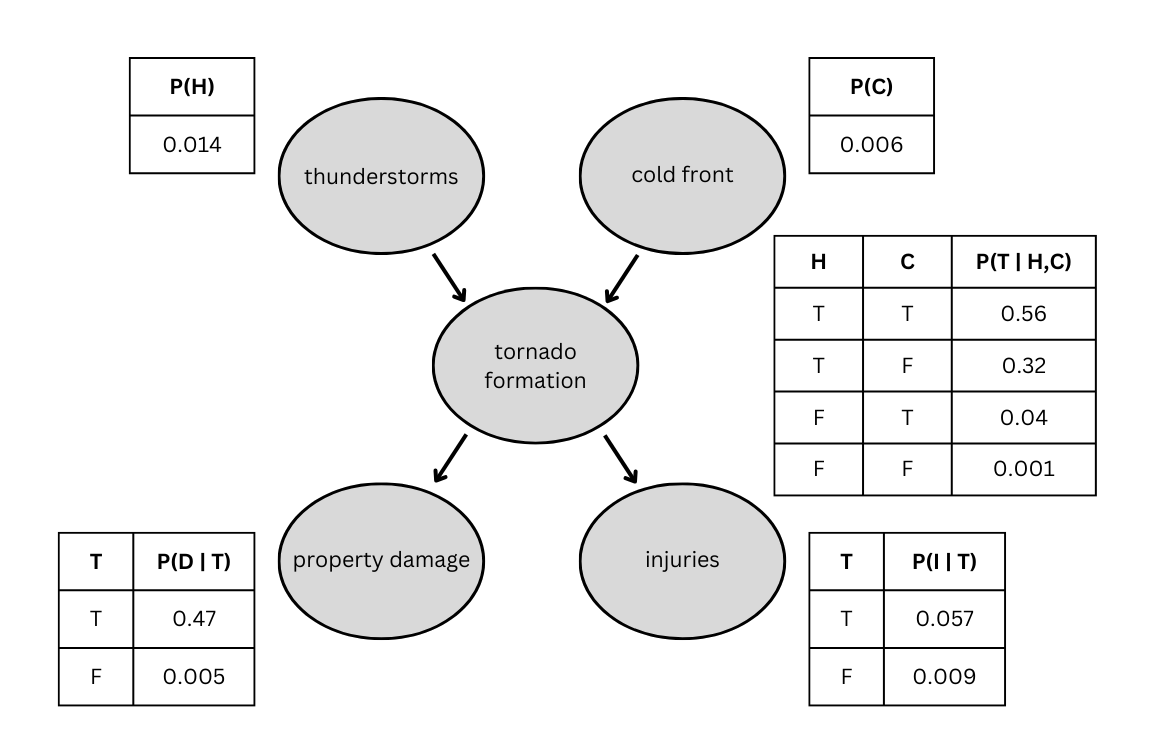

#### If the above diagram, isn't showing up for you in the notebook, please refer to bayes_network.png

The above given problem is a Bayesian network, where we have two nodes with no parents - _thunderstorms_ and _cold_fronts_.  We have one node with two parents - _tornado_formation_ which leads to two children. The two children are _property_damage_ and _injuries_. Now, given this network, solve the questions below as specified.

You may refer to the [probability module](https://github.com/aimacode/aima-python/blob/master/probability4e.py) and the [probability notebook](https://github.com/aimacode/aima-python/blob/master/probability4e.ipynb) (with more explanations) in the aima-python repository.

### Questions:

1.1 What is the probability of tornado formation?  Write the solution symbolically first.  Your equation needs to include only the probabilites and sums necessary to solve the problem.  Substitute the numbers from the conditional probability tables above and solve for a numerical value of the probability.- **15 pts**

Begin with law of total probability:

$$P(T) = \sum_H \sum_C P(T | H,C) \cdot P(H | C) \cdot P(C)$$
However, $C$ and $H$ are independent according to the diagram:

$$P(T) = \sum_H \sum_C P(T | H,C) \cdot P(H) \cdot P(C)$$

Now, we expand the sum:

$$P(T) = P(T | H = T, C = T) \cdot P(H= T) \cdot P(C=T) + \\  P(T | H = T, C = F) \cdot P(H= T) \cdot P(C=F) + \\  P(T | H = F, C = T) \cdot P(H= F) + \cdot P(C=T) \\ P(T | H = F, C = F) \cdot P(H= F) + \cdot P(C=F)$$

Then, we substitute the values in:

$$P(T) = (0.56 \cdot 0.014 \cdot 0.006) + (0.32 \cdot 0.014 \cdot (1-0.006)) + (0.04\cdot(1-0.014)\cdot0.006) + (0.001 \cdot (1-0.014)\cdot(1-0.006)) = 0.00571688$$

1.2 What is the probability of property damage? Write the solution symbolically first.  Your equation needs to include only the probabilities and sums necessary to solve the problem.  Substitute the numbers from the conditional probability tables above and solve for a numerical value of the probability.  You may use results from earlier questions if they are helpful - **15 pts**

Again, we need to use law of total probability (Note, $D$ has only one parent, $T$):
$$P(D) = \sum_T P(D | T) \cdot P(T) = P(D | T = T) \cdot P(T=T) + P(D | T = F) \cdot P(T=F) $$

Note we know $P(T)$ from previous question and we know $P(T=F) = 1 - P(T)$. Now, let's compute the probability:
$$P(D) = 0.47 * 0.00571688 + 0.005 * (1-0.00571688) = 0.00765835 \approx 0.00766$$

1.3 What is the probability of thunderstorms given there is tornado formation? Write the solution symbolically first.  Your equation needs to include only the probabilites and sums necessary to solve the problem.  Substitute the numbers from the conditional probability tables above and solve for a numerical value of the probability.- **10
pts**


We use conditional probability first to see what equations we neeed:
$$P(H | T) = \frac{P(H,T)}{P(T)}$$

We know $P(T)$, but we don't know $P(H,T)$, so we need to use law of total probability to calculate it.

$$P(H,T) = \sum_C P(H,T,C) = \sum_C P(T|H,C) \cdot P(H) \cdot P(C) = P(T|H,C=T) \cdot P(H) \cdot P(C=T) + P(T|H,C=F) \cdot P(H) \cdot P(C=F)$$

Let's plug in the values for $P(H|T)$:

$$P(H | T) = \frac{0.56\cdot 0.014\cdot 0.006 + 0.32\cdot 0.014\cdot (1-0.006)}{0.00571688} = 0.78717062 \approx 0.787$$



1.4 Using enumeration, write the equation for the P(Injuries).  Your equation must include the joint distribution for all 5 of the variables and the sums necessary to solve for P(Injuries).  You only need to write the equation.  You do not need to solve for a numerical answer. **- 10 pts**

Let's form the equation for the joint probability of the network. We can do so by using law of total probability.
$$P(H,C,T,D,I) = \sum_H \sum_C \sum_T \sum_D \sum_I P(H,C,T,D,I)$$

$$P(H,C,T,D,I) = \sum_H \sum_C \sum_T \sum_D \sum_I P(D | T) \cdot P(I|T) \cdot P(T|H,C) \cdot P(H) \cdot P(C)$$

Thus, in order to calculate $P(I)$, we have:
$$P(I) = \sum_H \sum_C \sum_T \sum_D P(D | T) \cdot P(I|T) \cdot P(T|H,C) \cdot P(H) \cdot P(C)$$

---
## Solve through code - 
_Note_: In some of the questions, the answer is below the cell to allow you to check your answer.

### Problem 2

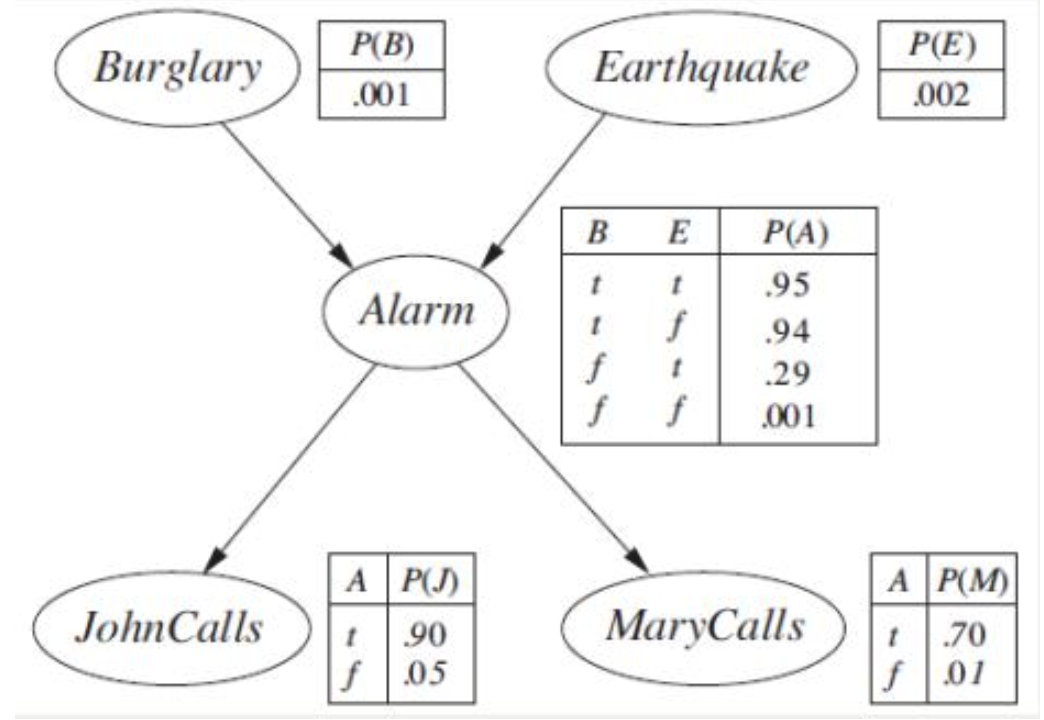

#### If the above diagram, isn't showing up for you in the notebook, please refer to alarm_bayes_network.png

For the above diagram, we have defined the Bayes Network as below.  **Note:** Capitalization and spacing must match exactly.

In [2]:
T, F = True, False

burglary = BayesNet([
    ('Burglary', '', 0.001),
    ('Earthquake', '', 0.002),
    ('Alarm', ['Burglary', 'Earthquake'],
     {(T, T): 0.95, (T, F): 0.94, (F, T): 0.29, (F, F): 0.001}),
    ('JohnCalls', 'Alarm', {T: 0.90, F: 0.05}),
    ('MaryCalls', 'Alarm', {T: 0.70, F: 0.01})
])
print(burglary.variables) # prints out all nodes present in the BayesNet

['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']


Example 1. Probability that John calls given burglary is True

In [3]:
# With definition of the function given above, X is the variable whose value we are looking for, 
# and e is the evidence we know

# In this problem, we are looking for the probability that John calls (X) given burglary is True (e)
# If you notice below, we add the [True] to the function, this is because enumeration_ask returns a type of dictionary
# whose keys are possible values of the variable X (True, False)

enumeration_ask('JohnCalls', {'Burglary': T}, burglary)[True]

0.849017

0.849017

Example 2. Probability that John calls

In [4]:
enumeration_ask('JohnCalls', {}, burglary)[True]

0.0521389757

0.0521389757

### Questions:

2.1 Probability of an earthquake given mary calls - **5 pts**

In [5]:
# write your solution here
enumeration_ask('Earthquake', {'MaryCalls' : True}, burglary)[True]

0.03588091528645573

0.03588091528645573

2.2 Probability that John and Mary both call given burglary is set to True - **5 pts** \
_Hint_: John and Mary calling are independent events

In [6]:
# write your solution here
#P(J,M | B) = P(J|B) * P(M|B)
enumeration_ask('JohnCalls', {'Burglary' : True}, burglary)[True] * enumeration_ask('MaryCalls', {'Burglary' : True}, burglary)[True]

0.5591743126345999

2.3 Probability that either John or Mary call given there's a burglary (burglary is set to True) - **5 pts** \
_Hint_: P(A or B) = P(A) + P(B) - P(A and B)

In [7]:
# write your solution here
#P(J or M | B) = P(J | B) + P(M | B) - P(J|B)*P(M|B)
enumeration_ask('JohnCalls', {'Burglary' : True}, burglary)[True] + enumeration_ask('MaryCalls', {'Burglary' : True}, burglary)[True] - enumeration_ask('JohnCalls', {'Burglary' : True}, burglary)[True] * enumeration_ask('MaryCalls', {'Burglary' : True}, burglary)[True]

0.9484564873653999

0.9484564873653999

### Problem 3

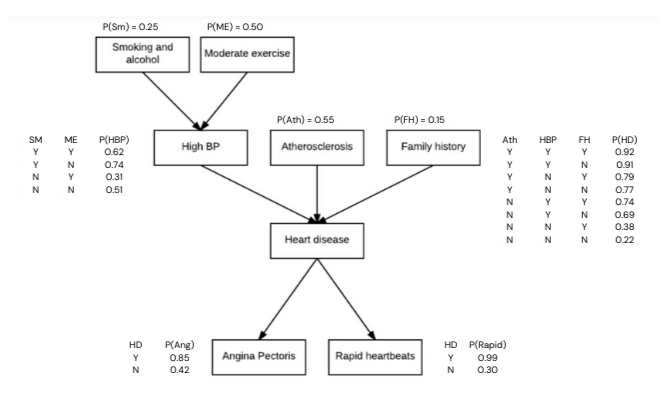

#### If the above diagram, isn't showing up for you in the notebook, please refer to bayes_network_2.png


### Questions

3.1 For this network, what is P(Heart Disease)? **- 10 pts**

In [8]:
# Write your solution here
#P(HD) = sum_Ath sum_HBP sum_FH sum_SM sum_ME P(HD | Ath, HBP, FH) * P(Ath) * P(FH) * P(HBP | SM, ME) * P(SM) * P(ME)
hd_given_ath_hbp_fh = {
    ('y', 'y', 'y') : 0.92,
    ('y', 'y', 'n') : 0.91,
    ('y', 'n', 'y') : 0.79,
    ('y', 'n', 'n') : 0.77,
    ('n', 'y', 'y') : 0.74,
    ('n', 'y', 'n') : 0.69,
    ('n', 'n', 'y') : 0.38,
    ('n', 'n', 'n') : 0.22
}
hbp_given_sm_me = {
    ('y','y') : 0.62,
    ('y', 'n') : 0.74,
    ('n', 'y') : 0.31,
    ('n', 'n') : 0.51
}
ath_dict = {
    'y' : 0.55,
    'n' : 0.45
}
fh_dict = {
    'y' : 0.15,
    'n' : 0.85
}
sm_dict = {
    'y' : 0.25,
    'n' : 0.75
}
me_dict = {
    'y' : 0.5,
    'n' : 0.5
}
true_or_false = ['y', 'n']
ans_3_1 = 0
for ath in true_or_false:
    for hbp in true_or_false:
        for fh in true_or_false:
            for sm in true_or_false:
                for me in true_or_false:
                    hpb_calc = hbp_given_sm_me[(sm,me)] if hbp == 'y' else (1-hbp_given_sm_me[(sm,me)])
                    ans_3_1 += hd_given_ath_hbp_fh[(ath, hbp, fh)] * ath_dict[ath] * fh_dict[fh] * hpb_calc  * sm_dict[sm] * me_dict[me]

print(ans_3_1)

0.6687693750000002


3.2 You have a patient who Smokes and Consumes alcohol, doesn't exercise at all, and has a family history of heart disease.  What is the probability that patient will have Angina Pectoris? **- 5 pts**

In [9]:
# Write your solution here
#P(ang | sm = y, me = n, fh = y) = \sum_{hd, ath, bp} p(ang | hd) * P(hd | ath, fh = y, hbp)  * p(ath) * p(hbp | sm = y, me=n) (num)
ang = 'y'
sm = 'y'
me = 'n'
fh = 'y'

ang_dict = {
    'y' : 0.85,
    'n' : 0.42
}
ans_3_2 = 0
for hd in true_or_false:
    for ath in true_or_false:
        for hbp in true_or_false:
            hd_yes_or_no = hd_given_ath_hbp_fh[(ath, hbp, fh)] if hd == 'y' else (1 - hd_given_ath_hbp_fh[(ath, hbp, fh)])
            hbp_yes_or_no = hbp_given_sm_me[(sm,me)] if hbp == 'y' else (1-hbp_given_sm_me[(sm,me)])
            ans_3_2 += (ang_dict[hd] * hd_yes_or_no * ath_dict[ath] * hbp_yes_or_no)

ans_3_2

0.7546647000000001

3.3 You have a patient with Angina Pectoris and Rapid Heartbeats. The patient also has a Family History of Heart Disease. What is the probability the patient has Athersclerosis? **- 5 pts**


In [10]:
# Write your answer here
# 3.3
# p(ath = true | fh = true, ang = true, rapid = true)=
# p(ath = true, fh = true, ang = true, rapid = true) = p(ath = true) * p(fh = true) * sum_hd sum_hbp sum_sm sum_me p(ang = true | hd) * p(rapid = true| hd) * p(hd | ath = true, hbp, fh = true) * P(hbp | sm, me) * p(sm)*p(me)
# p(fh=true, ang=true, rapid=true) =p(fh = true) * sum_hd sum_hbp sum_sm sum_me sum_ath p(ang = true | hd) * p(rapid = true| hd) * p(hd | ath = true, hbp, fh = true) * P(hbp | sm, me) * p(sm)*p(me) *  p(ath)  

# 1. calc hbp = true
hbp_yes = 0
for sm in true_or_false:
    for me in true_or_false:
        hbp_yes += (hbp_given_sm_me[(sm, me)] * sm_dict[sm] * me_dict[me])
print(f"hpb_yes : {hbp_yes}")
# 2. complete calculation for numerator
ang = 'y'
rapid = 'y'
ath = 'y'
fh = 'y'

rapid_dict = {
    'y' : 0.99,
    'n' : 0.3
}

num = 0
for hbp in true_or_false:
    p_hbp_y_or_n = hbp_yes if hbp == 'y' else (1 - hbp_yes)
    for hd in true_or_false:
        hd_yes_or_no = hd_given_ath_hbp_fh[(ath, hbp, fh)] if hd == 'y' else (1 - hd_given_ath_hbp_fh[(ath, hbp, fh)])
        num += p_hbp_y_or_n * ang_dict[hd] * rapid_dict[hd] * hd_yes_or_no
num *= ath_dict['y']

# 3. compute denom

denom = 0

for hbp in true_or_false:
    p_hbp_y_or_n = hbp_yes if hbp == 'y' else (1 - hbp_yes)
    for hd in true_or_false:
        for ath in true_or_false:
            hd_yes_or_no = hd_given_ath_hbp_fh[(ath, hbp, fh)] if hd == 'y' else (1 - hd_given_ath_hbp_fh[(ath, hbp, fh)])
            denom += ang_dict[hd] * rapid_dict[hd] * hd_yes_or_no * ath_dict[ath] * p_hbp_y_or_n
ans_3_3 = num/denom

print(f"Answer is : {ans_3_3}")

hpb_yes : 0.47750000000000004
Answer is : 0.6331861741460131


3.4 In your own words, describe the difference between diagnostic and causal reasoning in Bayesian networks. **- 5 points**

### Answer to 3.4
**Causal reasoning** is reasoning **forward** — from **cause to effect**.\
You begin with established causes (i.e. *asthma* or *poor diet*) and apply the network to determine probable effects or outcomes (i.e. *diabetes* or *chronic respiratory disease*).

**Diagnostic reasoning** is reasoning **backward** — from **effect to cause**.\
You begin with relative effects (i.e. *sudden weight loss* or *persistent cough*) and apply the network to determine the most likely causes from these symptoms (i.e. *COPD* or *cancer*).

3.5 How could a physician use this Bayes Network to help with counseling patients who have a family history of heart disease yet they smoke and drink alcohol and don't exercise?  Hint: You may want to compare your results from 4.1 to those from 4.2 to determine how the probabilites change depending on how the patient behaves.  **- 10 points**

The network allows the doctor to transition from generic warnings to **personalized, quantitative risk assessment** by comparing two probabilities:

---

### **1. Quantification of Current High Risk (Scenario: Unhealthy Lifestyle)**

The doctor informs the patient of their current risk of Angina Pectoris based on their unhealthy lifestyle. This high number acts as a more powerful motivator.

- **Representation (E):** Smokes/Drinks (SM=Y), No Exercise (ME=N), Family History (FH=Y)

- **Actual Risk (from Q3.2):**

$$
P(\text{Angina\ Pectoris} \mid E) \approx 0.7547 \text{ or 75.47\%}
$$

- **Counseling Message:**  
  “Considering how you're living your life right now, you have a 75% probability of developing Angina Pectoris — one of the most painful symptoms of heart disease. This percentage is alarmingly high. Your lifestyle has compounded your genetic risk.”

---

### **2. Quantification of Risk Reduction (Scenario: Healthy Lifestyle)**

The second way the physician uses the Bayes Network is to calculate the **reduced risk** if the patient transitions to a healthier lifestyle (quitting smoking/drinking and exercising). Instead of shaming the behavior, this quantifiable perspective highlights the value of lifestyle improvement.

- **Hypothetical Change: Good Lifestyle (SM=N, ME=Y, FH=Y)**

The doctor would explain that the patient cannot completely remove their genetic risk due to family history, but they can **significantly lower** lifestyle-related risks.

To emphasize the change, the doctor first illustrates the effect on **HBP:**

| Lifestyle Factors | \( P(HBP=Y) \) |
|--------------------|----------------|
| Current (SM=Y, ME=N) | **0.74** |
| Improved (SM=N, ME=Y) | **0.31** |

The doctor would then recalculate the final probability for Angina Pectoris:

$$
P(\text{Angina} \mid SM=N, ME=Y, FH=Y)
$$

This new probability would likely be **much lower** (potentially below 0.35).

- **Counseling Message:**  
  “If you stop smoking/drinking and start exercising moderately, your probability of high blood pressure drops from 74% to 31%. This major change would likely reduce your risk of Angina Pectoris from about 75% to a much lower level — closer to someone with a weaker genetic predisposition.”

---

By using variables from the Bayesian Network to produce these concrete, comparative numbers, the doctor empowers the patient with **data-driven feedback** and a tangible goal, showing how specific lifestyle changes can statistically reduce their overall cardiac risk.
